In [2]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR, SVC

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

from matches_clean import clean_player_pairs_data, train_test_split_data

In [3]:
df_clean = clean_player_pairs_data()
df_clean

/home/maebee/code/maebeexo/1039_esports/1039_esports/matches_clean.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['player_win'] = np.where(df_clean["player"] == df_clean["winner"], 1, 0)


,match_id,player,player_deaths_per_min,player_assists_per_min,player_tower_damage,player_xp_per_min,player_gold_per_min,player_kills_per_min,player_roshans_killed,player_obs_placed,...,opponent_roshans_killed,opponent_obs_placed,winner,player_tower_damage_per_min,opponent_tower_damage_per_min,player_hero_damage_per_min,opponent_hero_damage_per_min,player_last_hits_per_min,opponent_last_hits_per_min,player_win
0,6880924214,153110997,0.335188,0.187333,0,503.150000,385.550000,0.122589,0,0,...,0,0,1121170451,87.487301,134.999055,523.412499,682.043428,3.770177,5.146437,0
1,6880924314,118839691,0.200999,0.364690,0,561.550000,419.950000,0.173890,0,0,...,0,0,437601765,29.820544,32.060741,567.566668,332.453105,3.286680,1.432901,0
2,6880924403,124272893,0.195932,0.436385,0,1261.550000,917.300000,0.338771,0,0,...,0,0,233422854,36.548082,42.616946,849.969050,757.211362,4.128932,3.475098,0
3,6880924409,147428574,0.285012,0.483784,0,1062.947368,836.947368,0.281019,0,0,...,0,0,292686154,75.170211,42.982709,930.582114,464.727839,4.912842,2.282288,0
4,6880924612,208034581,0.124555,0.242047,0,590.950000,449.250000,0.147420,0,0,...,0,0,140386828,87.429535,88.834284,442.886421,749.092912,5.061386,4.677286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,6880984506,161169141,0.272877,0.458754,0,893.600000,664.000000,0.250579,0,0,...,0,0,161169141,53.302940,61.295424,657.840718,924.055613,3.651013,4.366161,1
365,6880984511,235594146,0.203842,0.404950,0,630.650000,427.750000,0.168786,0,0,...,0,0,235594146,26.708293,71.947462,563.919819,648.868741,2.744700,3.906955,1
366,6880984601,209671511,0.237084,0.380958,0,865.900000,597.900000,0.269080,0,0,...,0,0,153377558,35.088362,120.921167,959.735814,741.999778,3.287065,5.779463,0
368,6880984916,1114033184,0.197599,0.370387,0,630.842105,506.105263,0.209541,0,0,...,0,0,101716222,85.488497,154.664881,631.551852,767.719287,4.694824,6.190445,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split_data()
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

/home/maebee/code/maebeexo/1039_esports/1039_esports/matches_clean.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['player_win'] = np.where(df_clean["player"] == df_clean["winner"], 1, 0)


In [6]:
xgb = XGBRegressor(max_depth=10, n_estimators=50, learning_rate=0.1)

In [7]:
xgb.fit(X_train, y_train,
        verbose=False,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        eval_metric=['rmse'],
        early_stopping_rounds=10)

/home/maebee/.pyenv/versions/lewagon/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [8]:
results = xgb.evals_result()
min(results['validation_0']['rmse'])

0.138016

Text(0.5, 1.0, 'XGBoost')

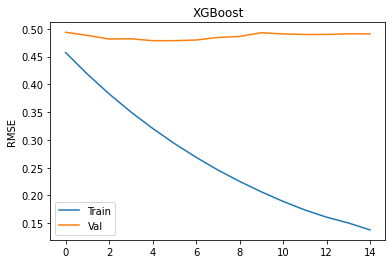

In [15]:
epochs = len(results['validation_0']["rmse"])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Val')
ax.legend(); plt.ylabel('RMSE'); plt.title('XGBoost')

In [10]:
gb_model = GradientBoostingRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

In [18]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10)

In [19]:
results_gb = xgb.evals_result()
min(results_gb['validation_0']['rmse'])

0.138016

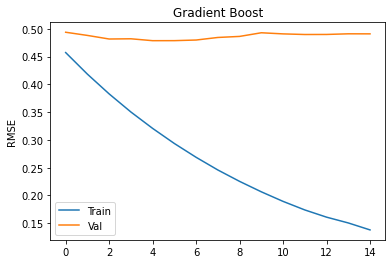

In [22]:
epochs_gb = len(results['validation_0']["rmse"])
x_axis_gb = range(0, epochs_gb)

fig, ax = plt.subplots()
ax.plot(x_axis_gb, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis_gb, results['validation_1']['rmse'], label='Val')
ax.legend(); plt.ylabel('RMSE'); plt.title('Gradient Boost');